In [17]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load data
x_train = pd.read_csv('../../outputs/Assignment_3/x_train.csv')
y_train = pd.read_csv('../../outputs/Assignment_3/y_train.csv').values.ravel()

# Feature extraction
x_train['Total Credits'] = x_train['Curricular units 1st sem (credited)'] + x_train['Curricular units 2nd sem (credited)']
x_train['Total Enrolled Units'] = x_train['Curricular units 1st sem (enrolled)'] + x_train['Curricular units 2nd sem (enrolled)']
x_train['Total Approved Units'] = x_train['Curricular units 1st sem (approved)'] + x_train['Curricular units 2nd sem (approved)']
x_train['Average Grade'] = x_train[['Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)']].mean(axis=1)

# Binary features
x_train['Is International Student'] = x_train['International'].apply(lambda x: 1 if x == 1 else 0)
x_train['Is Debtor'] = x_train['Debtor'].apply(lambda x: 1 if x == 1 else 0)
x_train['Has Scholarship'] = x_train['Scholarship holder'].apply(lambda x: 1 if x == 1 else 0)

# Interaction terms
x_train['Scholarship_ApprovedUnits_Interaction'] = x_train['Has Scholarship'] * x_train['Total Approved Units']
x_train['Unemployment_Credits_Interaction'] = x_train['Unemployment rate'] * x_train['Total Credits']
x_train['International_Grade_Interaction'] = x_train['Is International Student'] * x_train['Average Grade']
x_train['Parental_Qualification_Interaction'] = x_train["Mother's qualification"] * x_train["Father's qualification"]
x_train['Enrolled_Approved_Interaction'] = x_train['Total Enrolled Units'] * x_train['Total Approved Units']
x_train['GDP_Enrollment_Interaction'] = x_train['GDP'] * x_train['Total Enrolled Units']

# Additional ratios
x_train['Approval_Rate'] = x_train['Total Approved Units'] / (x_train['Total Enrolled Units'] + 1e-5)
x_train['Scholarship_Grade_Impact'] = x_train['Has Scholarship'] * x_train['Average Grade']

# Polynomial features
x_train['Grade_Squared'] = x_train['Average Grade'] ** 2

# Scale interaction features
interaction_features = ['Scholarship_ApprovedUnits_Interaction', 'Unemployment_Credits_Interaction',
                        'International_Grade_Interaction', 'Parental_Qualification_Interaction',
                        'Enrolled_Approved_Interaction', 'GDP_Enrollment_Interaction']
scaler = MinMaxScaler()
x_train[interaction_features] = scaler.fit_transform(x_train[interaction_features])

# Display the new features
new_features = [
    # Basic aggregated features
    'Total Credits',
    'Total Enrolled Units',
    'Total Approved Units',
    'Average Grade',

    # Binary features
    'Is International Student',
    'Is Debtor',
    'Has Scholarship',

    # Interaction features
    'Scholarship_ApprovedUnits_Interaction',
    'Unemployment_Credits_Interaction',
    'International_Grade_Interaction',
    'Parental_Qualification_Interaction',
    'Enrolled_Approved_Interaction',
    'GDP_Enrollment_Interaction',

    # Additional ratios and transformations
    'Approval_Rate',
    'Scholarship_Grade_Impact',
    'Grade_Squared'
]


print("Extracted Features:")
print(x_train[new_features].head())


Extracted Features:
   Total Credits  Total Enrolled Units  Total Approved Units  Average Grade  \
0            0.0                  -2.0                 -2.25      -5.009245   
1            0.0                   0.0                 -1.00      -0.205124   
2            0.0                   0.0                  0.75       0.797232   
3            0.0                   0.0                 -2.25      -5.009245   
4            0.0                   2.0                  0.75       0.793131   

   Is International Student  Is Debtor  Has Scholarship  \
0                         0          0                0   
1                         0          0                1   
2                         0          0                0   
3                         0          0                0   
4                         0          0                1   

   Scholarship_ApprovedUnits_Interaction  Unemployment_Credits_Interaction  \
0                                  0.225                          0.4571

In [18]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load data
x_train = pd.read_csv('../../outputs/Assignment_3/x_train.csv')
y_train = pd.read_csv('../../outputs/Assignment_3/y_train.csv').values.ravel()

# Feature extraction
x_train['Total Credits'] = x_train['Curricular units 1st sem (credited)'] + x_train['Curricular units 2nd sem (credited)']
x_train['Total Enrolled Units'] = x_train['Curricular units 1st sem (enrolled)'] + x_train['Curricular units 2nd sem (enrolled)']
x_train['Total Approved Units'] = x_train['Curricular units 1st sem (approved)'] + x_train['Curricular units 2nd sem (approved)']
x_train['Average Grade'] = x_train[['Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)']].mean(axis=1)

# Binary features
x_train['Is International Student'] = x_train['International'].apply(lambda x: 1 if x == 1 else 0)
x_train['Is Debtor'] = x_train['Debtor'].apply(lambda x: 1 if x == 1 else 0)
x_train['Has Scholarship'] = x_train['Scholarship holder'].apply(lambda x: 1 if x == 1 else 0)

# Interaction terms
x_train['Scholarship_ApprovedUnits_Interaction'] = x_train['Has Scholarship'] * x_train['Total Approved Units']
x_train['Unemployment_Credits_Interaction'] = x_train['Unemployment rate'] * x_train['Total Credits']
x_train['International_Grade_Interaction'] = x_train['Is International Student'] * x_train['Average Grade']
x_train['Parental_Qualification_Interaction'] = x_train["Mother's qualification"] * x_train["Father's qualification"]
x_train['Enrolled_Approved_Interaction'] = x_train['Total Enrolled Units'] * x_train['Total Approved Units']
x_train['GDP_Enrollment_Interaction'] = x_train['GDP'] * x_train['Total Enrolled Units']

# Additional ratios
x_train['Approval_Rate'] = x_train['Total Approved Units'] / (x_train['Total Enrolled Units'] + 1e-5)
x_train['Scholarship_Grade_Impact'] = x_train['Has Scholarship'] * x_train['Average Grade']

# Polynomial features
x_train['Grade_Squared'] = x_train['Average Grade'] ** 2

# Scale interaction features
interaction_features = ['Scholarship_ApprovedUnits_Interaction', 'Unemployment_Credits_Interaction',
                        'International_Grade_Interaction', 'Parental_Qualification_Interaction',
                        'Enrolled_Approved_Interaction', 'GDP_Enrollment_Interaction']
scaler = MinMaxScaler()
x_train[interaction_features] = scaler.fit_transform(x_train[interaction_features])



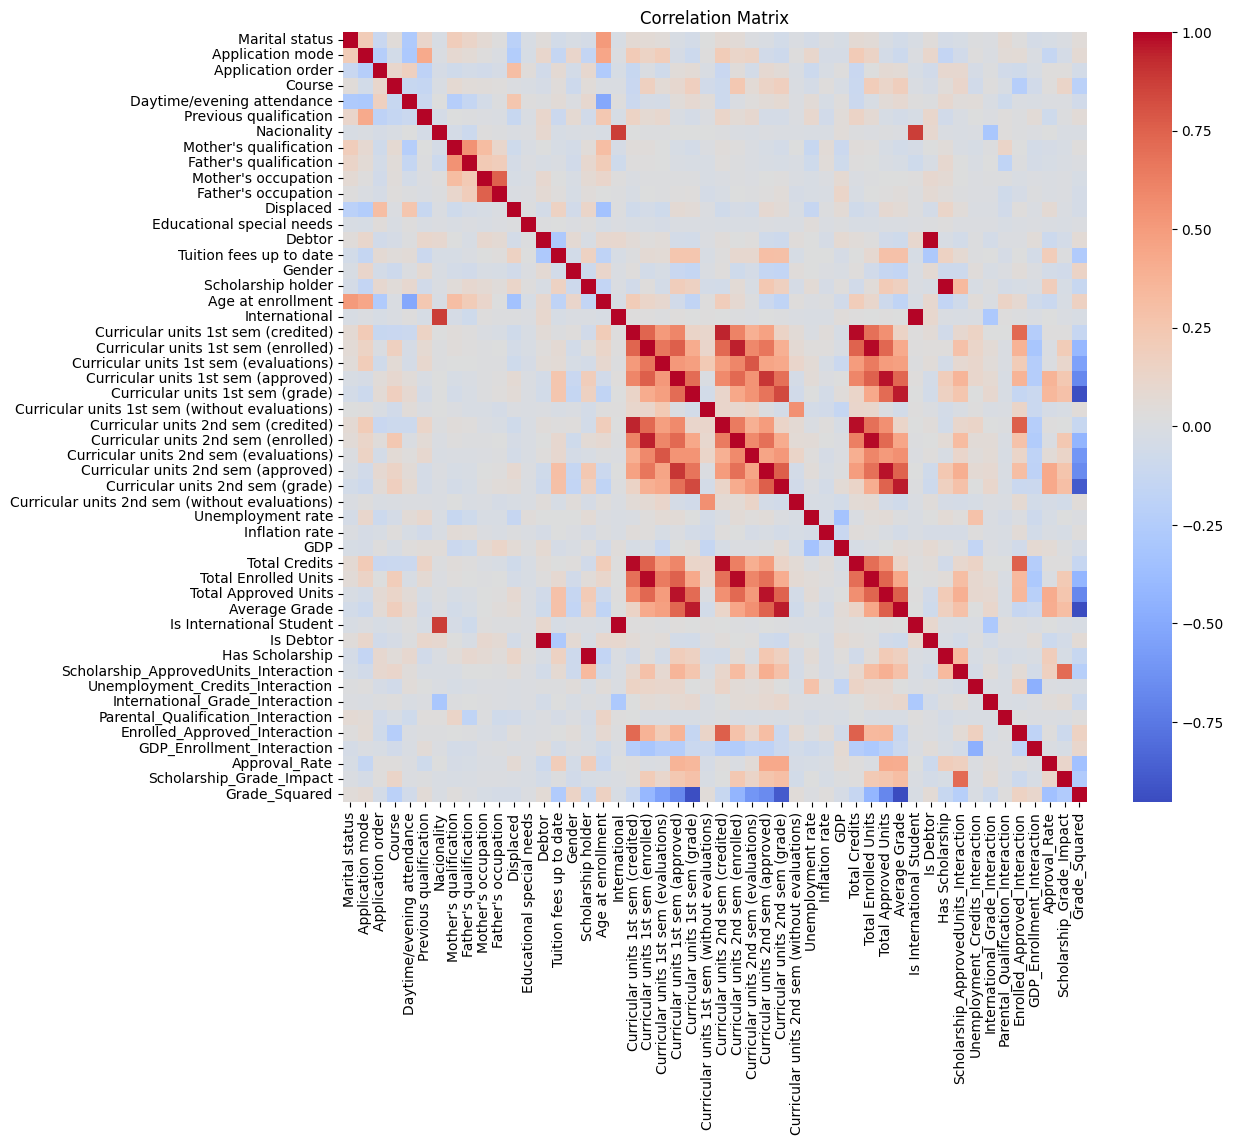

Data with feature extraction applied has been saved to ../../outputs/Assignment_3/extracted_features_data.csv.


In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize Correlation Matrix (optional, just for feature analysis)
correlation_matrix = x_train.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

# Combine X and y into a single dataFrame for saving
final_x_train = x_train.copy()
final_x_train['Target'] = y_train

# Save the x_train to a new file with feature extraction applied
output_path = '../../outputs/Assignment_3/extracted_features_data.csv'  # Adjust path as needed
final_x_train.to_csv(output_path, index=False)

print(f"Data with feature extraction applied has been saved to {output_path}.")

In [20]:
import pandas as pd


# Repeat for test data
x_test = pd.read_csv('../../outputs/Assignment_3/x_test.csv')
y_test = pd.read_csv('../../outputs/Assignment_3/y_test.csv').values.ravel()

# Apply same transformations to x_test
x_test['Total Credits'] = x_test['Curricular units 1st sem (credited)'] + x_test['Curricular units 2nd sem (credited)']
x_test['Total Enrolled Units'] = x_test['Curricular units 1st sem (enrolled)'] + x_test['Curricular units 2nd sem (enrolled)']
x_test['Total Approved Units'] = x_test['Curricular units 1st sem (approved)'] + x_test['Curricular units 2nd sem (approved)']
x_test['Average Grade'] = x_test[['Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)']].mean(axis=1)
x_test['Is International Student'] = x_test['International'].apply(lambda x: 1 if x == 1 else 0)
x_test['Is Debtor'] = x_test['Debtor'].apply(lambda x: 1 if x == 1 else 0)
x_test['Has Scholarship'] = x_test['Scholarship holder'].apply(lambda x: 1 if x == 1 else 0)
x_test['Scholarship_ApprovedUnits_Interaction'] = x_test['Has Scholarship'] * x_test['Total Approved Units']
x_test['Unemployment_Credits_Interaction'] = x_test['Unemployment rate'] * x_test['Total Credits']
x_test['International_Grade_Interaction'] = x_test['Is International Student'] * x_test['Average Grade']
x_test['Parental_Qualification_Interaction'] = x_test["Mother's qualification"] * x_test["Father's qualification"]
x_test['Enrolled_Approved_Interaction'] = x_test['Total Enrolled Units'] * x_test['Total Approved Units']
x_test['GDP_Enrollment_Interaction'] = x_test['GDP'] * x_test['Total Enrolled Units']
x_test['Approval_Rate'] = x_test['Total Approved Units'] / (x_test['Total Enrolled Units'] + 1e-5)
x_test['Scholarship_Grade_Impact'] = x_test['Has Scholarship'] * x_test['Average Grade']
x_test['Grade_Squared'] = x_test['Average Grade'] ** 2
x_test[interaction_features] = scaler.transform(x_test[interaction_features])


# Save the test data with extracted features
extracted_features_test_output_path = '../../outputs/Assignment_3/extracted_features_test_data.csv'
x_test.to_csv(extracted_features_test_output_path, index=False)
print(f"Test data with extracted features saved to {extracted_features_test_output_path}.")


Test data with extracted features saved to ../../outputs/Assignment_3/extracted_features_test_data.csv.
